## Real time corona tracker


____

In [1]:
#!pip install tabulate

In [2]:
#step-1:
# importing libraries 

import requests 
from bs4 import BeautifulSoup 
from tabulate import tabulate 
import os 
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
#step-2:
extract_contents = lambda row: [x.text.replace('\n', '') for x in row] 
URL = 'https://www.mohfw.gov.in/'

SHORT_HEADERS = ['SNo', 'State','Indian-Confirmed', 
				'Foreign-Confirmed','Cured','Death'] 

response = requests.get(URL).content 
soup = BeautifulSoup(response, 'html.parser') 
header = extract_contents(soup.tr.find_all('th')) 


In [4]:
stats = [] 
all_rows = soup.find_all('tr') 

for row in all_rows: 
	stat = extract_contents(row.find_all('td')) 
	if stat: 
		if len(stat) == 5: 
			# last row 
			stat = ['', *stat] 
			stats.append(stat) 
		elif len(stat) == 6: 
			stats.append(stat) 

stats[-1][1] = "Total Cases"

stats.remove(stats[-1]) 


In [5]:
#step-3:
objects = [] 
for row in stats : 
	objects.append(row[1]) 

y_pos = np.arange(len(objects)) 

In [6]:
performance = [] 
for row in stats : 
	performance.append((row[2]) + (row[3])) 

table = tabulate(stats, headers=SHORT_HEADERS) 
print(table) 

SNo    State                               Indian-Confirmed  Foreign-Confirmed    Cured      Death
-----  --------------------------------  ------------------  -------------------  -------  -------
1      Andaman and Nicobar Islands                        0  33                   0             33
2      Andhra Pradesh                                  1817  2620                 73          4510
3      Arunachal Pradesh                                 46  1                    0             47
4      Assam                                           1846  547                  4           2397
5      Bihar                                           2460  2425                 30          4915
6      Chandigarh                                        31  273                  5            309
7      Chhattisgarh                                     653  266                  4            923
8      Dadar Nagar Haveli                                18  1                    0             19
9      Del

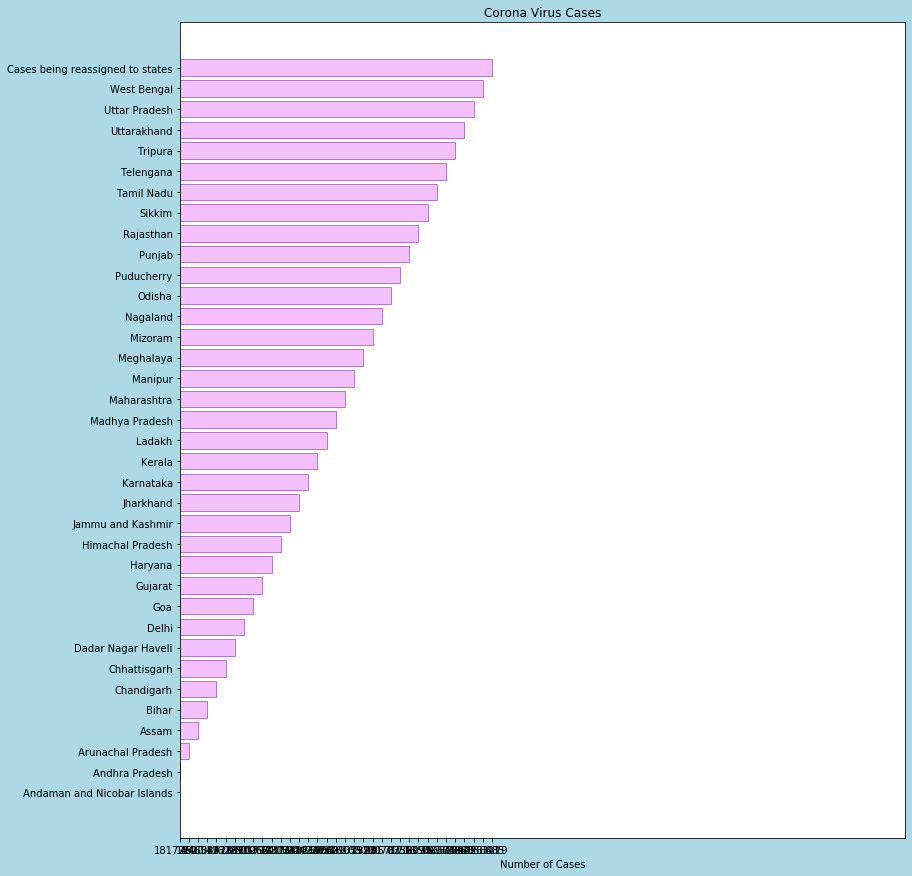

In [13]:
#step-4:

plt.figure(figsize=(13,15), facecolor='lightblue')
plt.barh(y_pos, performance, align='center', alpha=0.5, 
				color=(234/256.0, 128/256.0, 252/256.0), 
				edgecolor=(106/256.0, 27/256.0, 154/256.0),
        )
plt.yticks(y_pos, objects) 
plt.xlim(1,80) 
plt.xlabel('Number of Cases') 
plt.title('Corona Virus Cases') 
plt.show() 